### This notebook contains EDA of Makridakis (M5) competition time-series

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

from datetime import datetime

import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import accuracy_score
import time
import math

#Seaborn and matplotlib plots
import seaborn as sns
import matplotlib.pyplot as plt

#ANOVA test
from scipy.stats import f_oneway

In [2]:
# Download the CSV file
df = pd.read_csv('C:/Users/Deepak/Desktop/Manuscript prep/sales_train_validation.csv')
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [3]:
# Number of unique categorical(grouped) elements may be accessed through a method called .nunique().
# This gives us some clue whether a column has categorical values for machine learning problem (logistic) at later stages.
df.nunique()

id          30490
item_id      3049
dept_id         7
cat_id          3
store_id       10
            ...  
d_1909         53
d_1910         57
d_1911         61
d_1912         73
d_1913         65
Length: 1919, dtype: int64

In [4]:
# Detailed description of numeric + non-numeric columns can be obtained by .describe() 
df.describe(include='all')

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,30490,30490,30490,30490,30490,30490,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
unique,30490,3049,7,3,10,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,FOODS_3,FOODS,CA_1,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,10,8230,14370,3049,12196,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.070220,1.041292,0.780026,0.833454,...,1.370581,1.586159,1.693670,1.248245,1.232207,1.159167,1.149000,1.328862,1.605838,1.633158
std,NaN,NaN,NaN,NaN,NaN,NaN,5.126689,5.365468,3.667454,4.415141,...,3.740017,4.097191,4.359809,3.276925,3.125471,2.876026,2.950364,3.358012,4.089422,3.812248
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000


### Let us obtain plots for categorical variables FOODS, HOBBIES, and HOUSEHOLD. These are in cat_id column and needs to be transformed.

In [5]:
# Drop the unnecessary columns
df.drop(columns=['item_id', 'dept_id','store_id','state_id'],axis=1, inplace=True) 

# Transpose
data = df.T
data.columns = df['cat_id'] # ading product category id column to Data
data.index.name = None   # remove the name of index
data.drop(index='id',inplace=True) # remove first two rows
data.drop(index='cat_id',inplace=True) # remove the second row

#Add calendar
calendar = pd.read_csv('C:/Users/Deepak/Desktop/Manuscript prep/calendar.csv')

# change the format and the freq. of index to datetime format
data.index = calendar['date'][0:1913]

data.head()

cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,...,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0


In [6]:
# groupby to add duplicate columns or values in multiple columns of same
df = data.groupby(level=0, axis=1).sum()
df.head()

cat_id,FOODS,HOBBIES,HOUSEHOLD
date,,,
2011-01-29,23178,3764,5689
2011-01-30,22758,3357,5634
2011-01-31,17174,2682,3927
2011-02-01,18878,2669,3865
2011-02-02,14603,1814,2729


In [7]:
# For clean plots, let us create datetime series
df.index = pd.to_datetime(df.index)
df.index.freq = 'd'

### Create daily data for plots of each of these categories
Foods_daily = df.drop(['HOBBIES','HOUSEHOLD'],axis =1)
Hobbies_daily = df.drop(['FOODS','HOUSEHOLD'],axis =1)
Household_daily = df.drop(['HOBBIES','FOODS'],axis =1)
print(f'{Foods_daily.head()}\t{Hobbies_daily.head()}\t{Household_daily.head()}')

cat_id      FOODS
date             
2011-01-29  23178
2011-01-30  22758
2011-01-31  17174
2011-02-01  18878
2011-02-02  14603	cat_id      HOBBIES
date               
2011-01-29     3764
2011-01-30     3357
2011-01-31     2682
2011-02-01     2669
2011-02-02     1814	cat_id      HOUSEHOLD
date                 
2011-01-29       5689
2011-01-30       5634
2011-01-31       3927
2011-02-01       3865
2011-02-02       2729


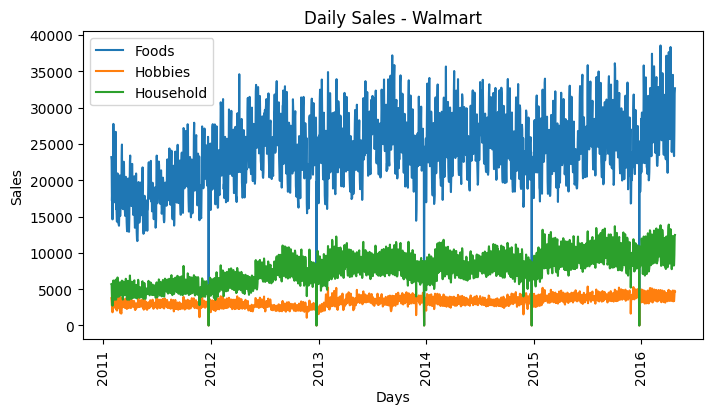

In [8]:
#Plot daily data

plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
plt.plot(Foods_daily, label='Foods')
plt.plot(Hobbies_daily, label='Hobbies')
plt.plot(Household_daily, label='Household')
plt.title('Daily Sales - Walmart')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()

In [9]:
#using resample() to convert to weekly data
df_weekly = df.resample('w').sum()
df_weekly.head()

cat_id,FOODS,HOBBIES,HOUSEHOLD
date,,,
2011-01-30,45936,7121,11323
2011-02-06,145851,20214,30165
2011-02-13,141740,20257,31718
2011-02-20,120641,18410,33277
2011-02-27,114126,19392,33127


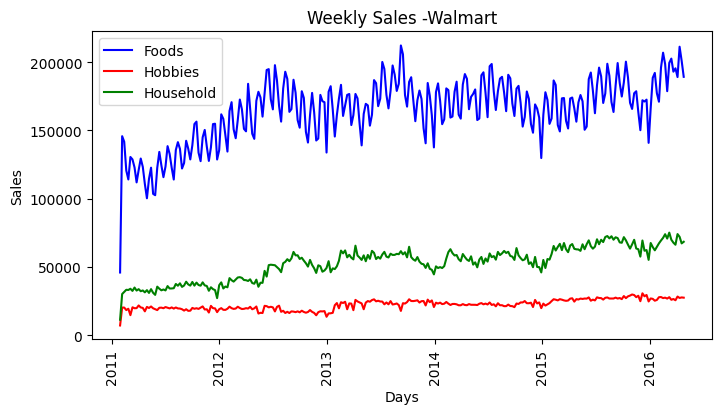

In [10]:
## Divide into three dataframes and plot
Foods_Weekly = df_weekly.drop(['HOBBIES','HOUSEHOLD'],axis =1)
Hobbies_Weekly = df_weekly.drop(['FOODS','HOUSEHOLD'],axis =1)
Household_Weekly = df_weekly.drop(['HOBBIES','FOODS'],axis =1)
# print(f'{Foods_Weekly.head()}\t{Hobbies_Weekly.head()}\t{Household_Weekly.head()}')

plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
plt.plot(Foods_Weekly, label='Foods',color = 'b')
plt.plot(Hobbies_Weekly, label='Hobbies',color = 'r')
plt.plot(Household_Weekly, label='Household',color = 'g')

plt.title('Weekly Sales -Walmart')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()

In [11]:
##using resample() to convert to month data
df_Monthly = df.resample('M').sum()
df_Monthly.head()

cat_id,FOODS,HOBBIES,HOUSEHOLD
date,,,
2011-01-31,63110,9803,15250
2011-02-28,520250,77362,128763
2011-03-31,534914,83691,144962
2011-04-30,509568,86199,141946
2011-05-31,491753,87413,140396


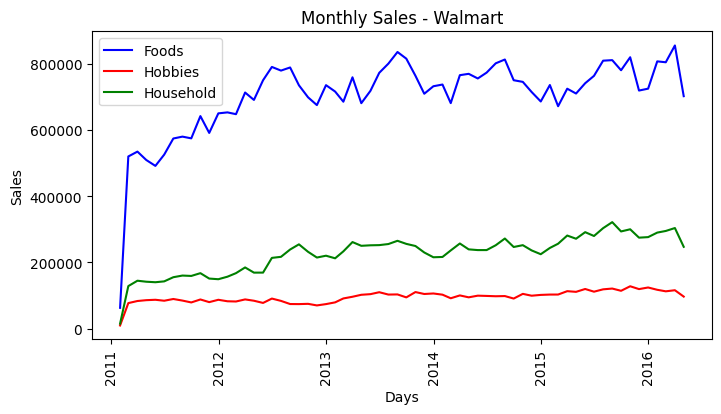

In [12]:
## Divide into three dataframes and plot
Foods_Monthly = df_Monthly.drop(['HOBBIES','HOUSEHOLD'],axis =1)
Hobbies_Monthly = df_Monthly.drop(['FOODS','HOUSEHOLD'],axis =1)
Household_Monthly = df_Monthly.drop(['HOBBIES','FOODS'],axis =1)
#print(f'{Foods_Monthly.head()}\t{Hobbies_Monthly.head()}\t{Household_Monthly.head()}')

plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
plt.plot(Foods_Monthly, label='Foods',color = 'b')
plt.plot(Hobbies_Monthly, label='Hobbies',color = 'r')
plt.plot(Household_Monthly, label='Household',color = 'g')

plt.title('Monthly Sales - Walmart')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()

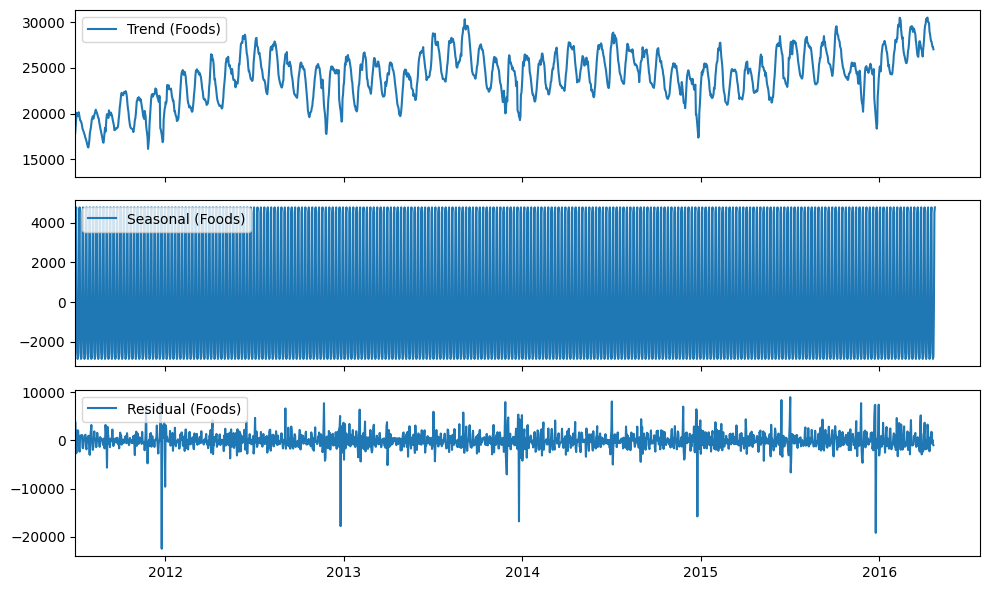

In [13]:
# Seasonality over daily data for Foods
decomposition = seasonal_decompose(x=Foods_daily['FOODS'])
estimated_trend = decomposition.trend
estimated_seasonal = decomposition.seasonal
estimated_residual = decomposition.resid

fig, ax = plt.subplots(3, sharex=True, figsize=(10, 6))

ax[0].plot(estimated_trend, label='Trend (Foods)')
ax[0].legend(loc='upper left')
ax[0].set_xlim(pd.Timestamp('2011-07-01'))

ax[1].plot(estimated_seasonal, label='Seasonal (Foods)')
ax[1].legend(loc='upper left')

ax[2].plot(estimated_residual, label='Residual (Foods)')
ax[2].legend(loc='upper left')

plt.tight_layout()
plt.show()

### test on onterdependency of variables 

In [14]:
df = pd.read_csv('C:/Users/Deepak/Desktop/Manuscript prep/sales_train_validation.csv')
#All category items are grouped together to create a target variable

df.drop(columns=['item_id', 'dept_id','store_id','state_id'],axis=1, inplace=True) 
data = df.T
data.columns = df['cat_id'] 
data.index.name = None   
data.drop(index='id',inplace=True) 
data.drop(index='cat_id',inplace=True) 
data.columns.name = None 
 
calendar = pd.read_csv('C:/Users/Deepak/Desktop/Manuscript prep/calendar.csv')
data.index = calendar['date'][0:1913]
df_cat = data.groupby(level=0, axis=1).sum()

#All department items are grouped together to create a target variable

df = pd.read_csv('C:/Users/Deepak/Desktop/Manuscript prep/sales_train_validation.csv')
df.drop(columns=['item_id', 'cat_id','store_id','state_id'],axis=1, inplace=True) 
data = df.T
data.columns = df['dept_id'] 
data.index.name = None   
data.drop(index='id',inplace=True) 
data.drop(index='dept_id',inplace=True) 
data.columns.name = None 

calendar = pd.read_csv('C:/Users/Deepak/Desktop/Manuscript prep/calendar.csv')
data.index = calendar['date'][0:1913]
df_dept = data.groupby(level=0, axis=1).sum()

#State-wise categorization
df = pd.read_csv('C:/Users/Deepak/Desktop/Manuscript prep/sales_train_validation.csv')
df.drop(columns=['item_id', 'dept_id','store_id','cat_id'],axis=1, inplace=True) 
data = df.T
data.columns = df['state_id'] 
data.index.name = None   
data.drop(index='id',inplace=True) 
data.drop(index='state_id',inplace=True) 
data.columns.name = None 
 
calendar = pd.read_csv('C:/Users/Deepak/Desktop/Manuscript prep/calendar.csv')
data.index = calendar['date'][0:1913]
df_state = data.groupby(level=0, axis=1).sum()

#Store-wise categorization
df = pd.read_csv('C:/Users/Deepak/Desktop/Manuscript prep/sales_train_validation.csv')
df.drop(columns=['item_id', 'dept_id','state_id','cat_id'],axis=1, inplace=True) 
data = df.T
data.columns = df['store_id'] 
data.index.name = None   
data.drop(index='id',inplace=True) 
data.drop(index='store_id',inplace=True) 
data.columns.name = None 
 
calendar = pd.read_csv('C:/Users/Deepak/Desktop/Manuscript prep/calendar.csv')
data.index = calendar['date'][0:1913]
df_store = data.groupby(level=0, axis=1).sum()
#Concat all dataframes
df = pd.concat([df_cat,df_dept,df_state,df_store, ], axis=1)
df.head(1)

,FOODS,HOBBIES,HOUSEHOLD,FOODS_1,FOODS_2,FOODS_3,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2,...,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,23178,3764,5689,2343,4094,16741,3610,154,4105,1584,...,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038


### ANOVA test

In [15]:
# Assuming your dataframe is named 'df'
columns_to_test = df.columns[:]  # Exclude the first column

# Create an empty list to store the results
anova_results = []

# Perform ANOVA test for each column
for column in columns_to_test:
    groups = df[column].unique()  # Get unique values in the column as groups
    data_groups = [df[df[column] == group].values.flatten() for group in groups]  # Split data into groups
    
    # Perform ANOVA test
    result = f_oneway(*data_groups)
    
    # Append the result to the list
    anova_results.append((column, result))

# Convert the list of results to a dataframe
anova_results_df = pd.DataFrame(anova_results, columns=['Column', 'ANOVA Result'])

# Print the ANOVA results
print(anova_results_df)

         Column                                  ANOVA Result
0         FOODS   (1.187355547472081, 1.0447011406962294e-07)
1       HOBBIES  (1.4324735049858794, 1.2281749235338802e-22)
2     HOUSEHOLD  (1.2389639370954924, 1.0363124587128915e-10)
3       FOODS_1   (1.5138564909334116, 9.582540603137535e-29)
4       FOODS_2   (1.3221166157243578, 3.031542220382674e-15)
5       FOODS_3   (1.2083061550556475, 7.242659461906343e-09)
6     HOBBIES_1  (1.4551225919366266, 6.1850741131065666e-24)
7     HOBBIES_2   (2.2594395452452667, 7.670195103918467e-45)
8   HOUSEHOLD_1  (1.2650020049668311, 2.4866538749538652e-12)
9   HOUSEHOLD_2   (1.9852693095086897, 5.181753049243204e-63)
10           CA  (1.2218587411375692, 1.0059863284043257e-09)
11           TX     (1.26968234503872, 9.556834677598882e-13)
12           WI  (1.2191150990746529, 1.7460876568592248e-09)
13         CA_1   (1.4385545343066422, 6.799360783542077e-25)
14         CA_2      (1.4305133407592, 5.348611049046874e-23)
15      

In [16]:
anova_results_df.columns

Index(['Column', 'ANOVA Result'], dtype='object')

In [17]:
# Extract the first column of the tuple in the second column of the dataframe and convert it to a list
F_statistic = anova_results_df['ANOVA Result'].apply(lambda x: x[0]).tolist()

# Print the resulting list
print(F_statistic)

[1.187355547472081, 1.4324735049858794, 1.2389639370954924, 1.5138564909334116, 1.3221166157243578, 1.2083061550556475, 1.4551225919366266, 2.2594395452452667, 1.2650020049668311, 1.9852693095086897, 1.2218587411375692, 1.26968234503872, 1.2191150990746529, 1.4385545343066422, 1.4305133407592, 1.3480063990040883, 1.7852880407744862, 1.642272062877767, 1.4346189961433988, 1.5635283784922673, 1.381266183247658, 1.295311074202861, 1.305058428422623]


In [18]:
# Extract the second column of the tuple in the second column of the dataframe and convert it to a list
p_value = anova_results_df['ANOVA Result'].apply(lambda x: x[1]).tolist()

# Print the resulting list
print(p_value)

[1.0447011406962294e-07, 1.2281749235338802e-22, 1.0363124587128915e-10, 9.582540603137535e-29, 3.031542220382674e-15, 7.242659461906343e-09, 6.1850741131065666e-24, 7.670195103918467e-45, 2.4866538749538652e-12, 5.181753049243204e-63, 1.0059863284043257e-09, 9.556834677598882e-13, 1.7460876568592248e-09, 6.799360783542077e-25, 5.348611049046874e-23, 5.537765525181059e-18, 5.470983777815144e-50, 1.5102262059215023e-40, 1.2645623576319179e-23, 5.1575807777510055e-34, 8.474615056909708e-20, 6.229043267699806e-14, 4.0472008835759047e-13]


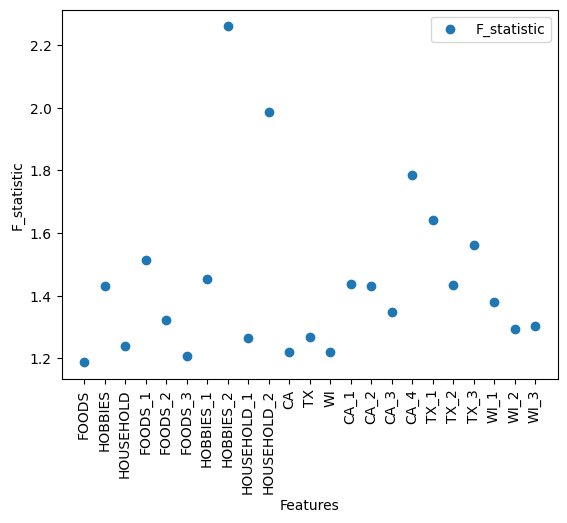

In [19]:
columns = ['FOODS','HOBBIES','HOUSEHOLD','FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1',
               'HOUSEHOLD_2','CA', 'TX','WI','CA_1','CA_2', 'CA_3','CA_4', 'TX_1', 'TX_2', 'TX_3','WI_1','WI_2', 'WI_3']  

F_statistic = [1.187355547472081, 1.4324735049858794, 1.2389639370954924, 1.5138564909334116, 1.3221166157243578, 
               1.2083061550556475, 1.4551225919366266, 2.2594395452452667, 1.2650020049668311, 1.9852693095086897, 
               1.2218587411375692, 1.26968234503872, 1.2191150990746529, 1.4385545343066422, 1.4305133407592, 
               1.3480063990040883, 1.7852880407744862, 1.642272062877767, 1.4346189961433988, 1.5635283784922673, 
               1.381266183247658, 1.295311074202861, 1.305058428422623]

plt.scatter(columns, F_statistic, label="F_statistic")
plt.xlabel("Features")
plt.ylabel("F_statistic")
plt.legend()
plt.xticks(rotation=90)
plt.show()

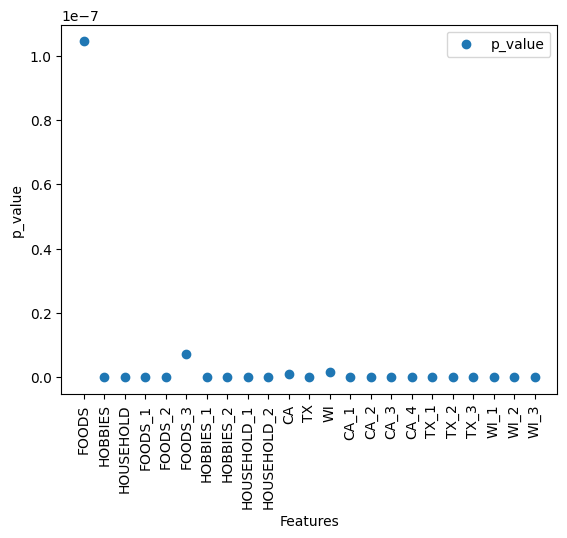

In [20]:
columns = ['FOODS','HOBBIES','HOUSEHOLD','FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1',
               'HOUSEHOLD_2','CA', 'TX','WI','CA_1','CA_2', 'CA_3','CA_4', 'TX_1', 'TX_2', 'TX_3','WI_1','WI_2', 'WI_3']

p_value = [1.0447011406962294e-07, 1.2281749235338802e-22, 1.0363124587128915e-10, 9.582540603137535e-29, 
           3.031542220382674e-15, 7.242659461906343e-09, 6.1850741131065666e-24, 7.670195103918467e-45, 
           2.4866538749538652e-12, 5.181753049243204e-63, 1.0059863284043257e-09, 9.556834677598882e-13, 
           1.7460876568592248e-09, 6.799360783542077e-25, 5.348611049046874e-23, 5.537765525181059e-18, 
           5.470983777815144e-50, 1.5102262059215023e-40, 1.2645623576319179e-23, 5.1575807777510055e-34, 
           8.474615056909708e-20, 6.229043267699806e-14, 4.0472008835759047e-13]

plt.scatter(columns, p_value, label="p_value")
plt.xlabel("Features")
plt.ylabel("p_value")
plt.legend()
plt.xticks(rotation=90)
plt.show()

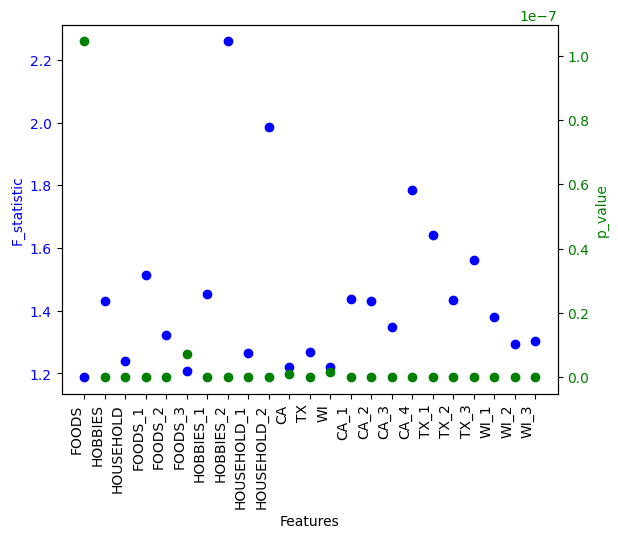

In [21]:
columns = ['FOODS','HOBBIES','HOUSEHOLD','FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1',
           'HOUSEHOLD_2','CA', 'TX','WI','CA_1','CA_2', 'CA_3','CA_4', 'TX_1', 'TX_2', 'TX_3','WI_1','WI_2', 'WI_3']

F_statistic = [1.187355547472081, 1.4324735049858794, 1.2389639370954924, 1.5138564909334116, 1.3221166157243578, 
               1.2083061550556475, 1.4551225919366266, 2.2594395452452667, 1.2650020049668311, 1.9852693095086897, 
               1.2218587411375692, 1.26968234503872, 1.2191150990746529, 1.4385545343066422, 1.4305133407592, 
               1.3480063990040883, 1.7852880407744862, 1.642272062877767, 1.4346189961433988, 1.5635283784922673, 
               1.381266183247658, 1.295311074202861, 1.305058428422623]

p_value = [1.0447011406962294e-07, 1.2281749235338802e-22, 1.0363124587128915e-10, 9.582540603137535e-29, 
           3.031542220382674e-15, 7.242659461906343e-09, 6.1850741131065666e-24, 7.670195103918467e-45, 
           2.4866538749538652e-12, 5.181753049243204e-63, 1.0059863284043257e-09, 9.556834677598882e-13, 
           1.7460876568592248e-09, 6.799360783542077e-25, 5.348611049046874e-23, 5.537765525181059e-18, 
           5.470983777815144e-50, 1.5102262059215023e-40, 1.2645623576319179e-23, 5.1575807777510055e-34, 
           8.474615056909708e-20, 6.229043267699806e-14, 4.0472008835759047e-13]

fig, ax1 = plt.subplots()

# Plotting F-statistics on the first y-axis
ax1.scatter(columns, F_statistic, label="F_statistic", color='blue', marker='o')
ax1.set_xlabel("Features")
ax1.set_xticklabels(columns, rotation=90, ha='right')
ax1.set_ylabel("F_statistic", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()

# Plotting p-values on the second y-axis
ax2.scatter(columns, p_value, label="p_value", color='green', marker='o')
ax2.set_ylabel("p_value", color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

In [22]:
for i in range(len(columns)):
    if p_value[i] < 0.05 and F_statistic[i] > 1:
        print(f"{columns[i]} is strongly dependent.")
    else:
        print(f"{columns[i]} is not strongly dependent.")

FOODS is strongly dependent.
HOBBIES is strongly dependent.
HOUSEHOLD is strongly dependent.
FOODS_1 is strongly dependent.
FOODS_2 is strongly dependent.
FOODS_3 is strongly dependent.
HOBBIES_1 is strongly dependent.
HOBBIES_2 is strongly dependent.
HOUSEHOLD_1 is strongly dependent.
HOUSEHOLD_2 is strongly dependent.
CA is strongly dependent.
TX is strongly dependent.
WI is strongly dependent.
CA_1 is strongly dependent.
CA_2 is strongly dependent.
CA_3 is strongly dependent.
CA_4 is strongly dependent.
TX_1 is strongly dependent.
TX_2 is strongly dependent.
TX_3 is strongly dependent.
WI_1 is strongly dependent.
WI_2 is strongly dependent.
WI_3 is strongly dependent.


In [23]:
# Assuming you have a dataframe named 'df' with the columns you want to check
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

                FOODS   HOBBIES  HOUSEHOLD   FOODS_1   FOODS_2   FOODS_3  \
FOODS        1.000000  0.647698   0.816305  0.777081  0.755877  0.979128   
HOBBIES      0.647698  1.000000   0.798286  0.595927  0.620374  0.579629   
HOUSEHOLD    0.816305  0.798286   1.000000  0.744935  0.695763  0.756746   
FOODS_1      0.777081  0.595927   0.744935  1.000000  0.513642  0.712468   
FOODS_2      0.755877  0.620374   0.695763  0.513642  1.000000  0.627920   
FOODS_3      0.979128  0.579629   0.756746  0.712468  0.627920  1.000000   
HOBBIES_1    0.644208  0.989401   0.775982  0.573510  0.587061  0.588649   
HOBBIES_2    0.356588  0.579782   0.540503  0.435849  0.509702  0.250975   
HOUSEHOLD_1  0.802332  0.770572   0.996084  0.740785  0.684152  0.742187   
HOUSEHOLD_2  0.782176  0.837317   0.890153  0.669463  0.665135  0.733382   
CA           0.939157  0.760991   0.892032  0.746823  0.700614  0.919258   
TX           0.938960  0.659658   0.832591  0.740809  0.681856  0.925535   
WI          

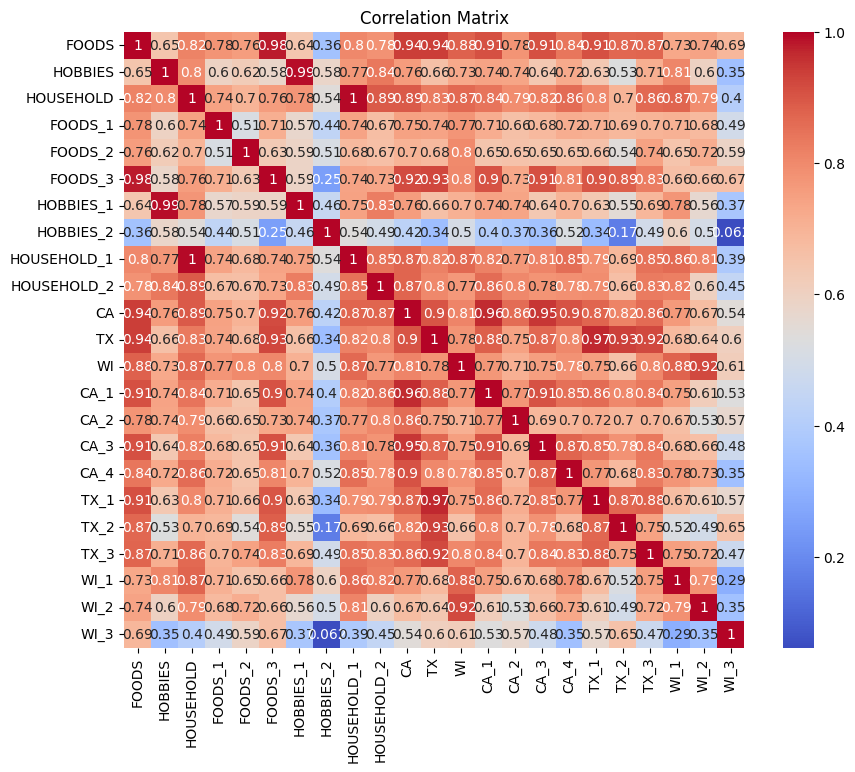

In [24]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

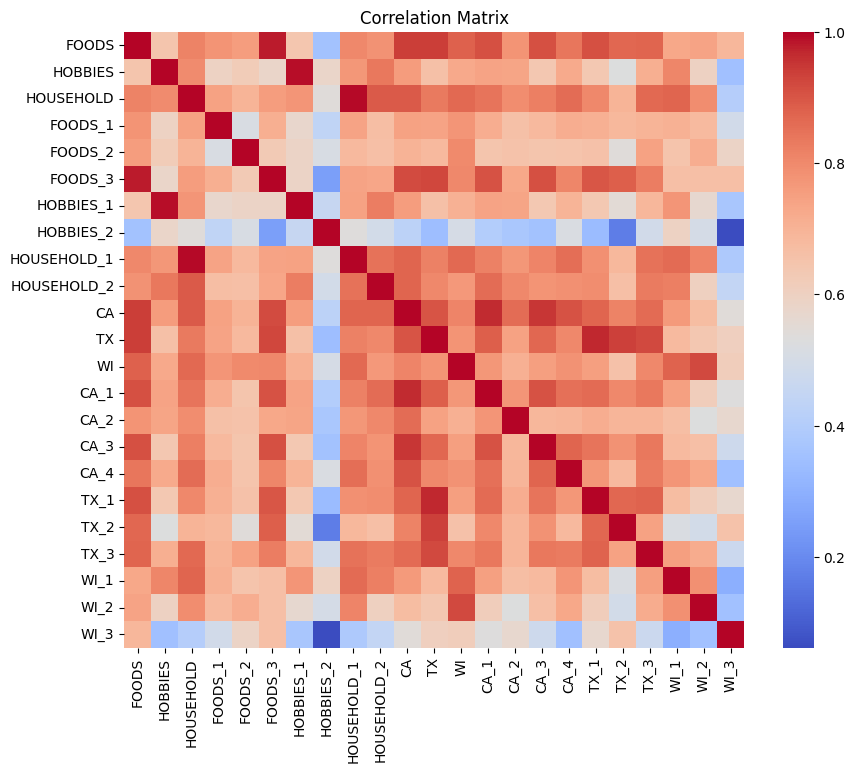

In [25]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()